### 3. Import the required packages with their customary aliases as follows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7171,Zimbabwe,1994,2603.927369,NaN
7172,Zimbabwe,1993,2420.092791,NaN
7173,Zimbabwe,1992,2437.152908,NaN
7174,Zimbabwe,1991,2733.696626,NaN
7175,Zimbabwe,1990,2652.129209,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [5]:
gdp_df.shape

(7176, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.drop(columns='Value Footnotes', inplace = True)

In [8]:
gdp_df.rename(
    columns = { 'Country or Area' : 'Country' 
                ,'Value' : 'GDP_Per_Capita'}
    ,inplace = True
)

### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [9]:
unique_year = list(set(gdp_df['Year']))
unique_year

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [10]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]
gdp_2020

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
19,Africa Eastern and Southern,2020,3491.978104
50,Africa Western and Central,2020,4021.293919
81,Albania,2020,13253.733337
112,Algeria,2020,10735.382539
...,...,...,...
7025,Vietnam,2020,10338.270543
7056,West Bank and Gaza,2020,5402.538773
7083,World,2020,16269.969854
7114,Zambia,2020,3277.816510


#### Histogram

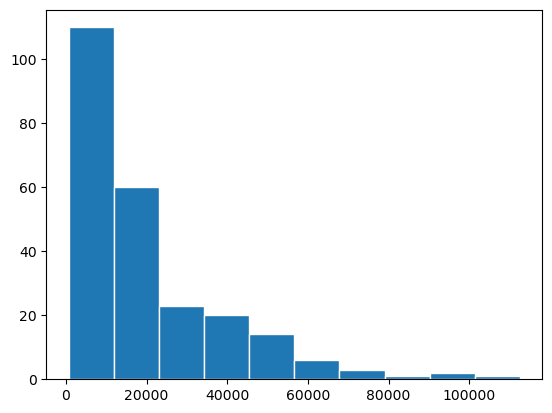

In [11]:
plt.hist(
    gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2020]
    ,edgecolor = 'white'
);

#### Density plot

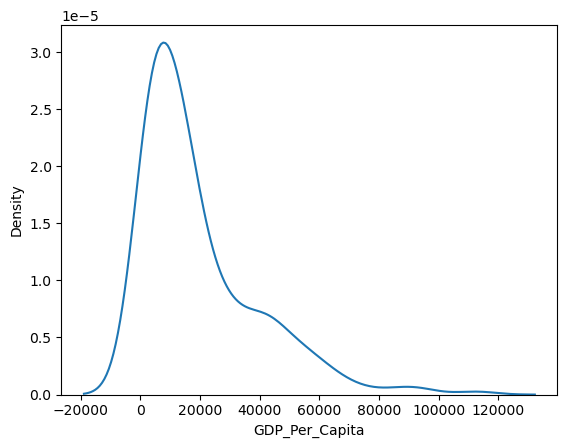

In [12]:
sns.kdeplot(gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2020]);

#### Box plot

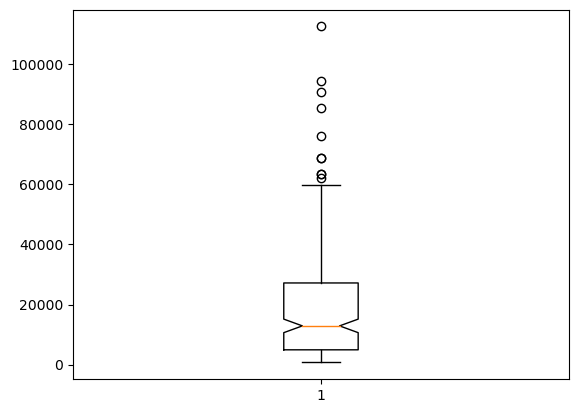

In [13]:
plt.boxplot(
    gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2020]
    ,notch = True
);

#### Violin plot

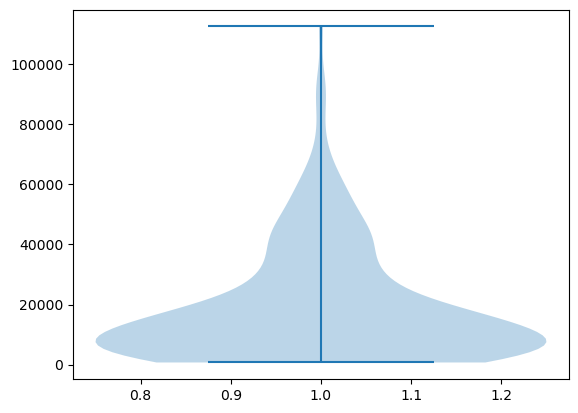

In [14]:
plt.violinplot(gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2020]);

### 9. What was the median GDP per capita value in 2020?

In [15]:
gdp_df['GDP_Per_Capita'].loc[gdp_df['Year'] == 2020].median()

12908.9374056206

### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
    
A boxplot
A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
A scatterplot
A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

#### Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [16]:
decade_list = [1990, 2000, 2010, 2020]

In [17]:
gdp_decades = gdp_df.query("Year in @decade_list")
gdp_decades

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
10,Afghanistan,2010,1957.029070
19,Africa Eastern and Southern,2020,3491.978104
29,Africa Eastern and Southern,2010,3545.205203
39,Africa Eastern and Southern,2000,2915.472987
...,...,...,...
7144,Zambia,1990,2190.181724
7145,Zimbabwe,2020,2134.555461
7155,Zimbabwe,2010,1813.531764
7165,Zimbabwe,2000,2771.060576


#### Data Preparation

In [18]:
data_1990 = gdp_decades.loc[gdp_decades['Year'] == 1990]
data_2000 = gdp_decades.loc[gdp_decades['Year'] == 2000]
data_2010 = gdp_decades.loc[gdp_decades['Year'] == 2010]
data_2020 = gdp_decades.loc[gdp_decades['Year'] == 2020]

#### Matplotlib Box plot
Why do I need subplots() for this? How can I set X axis

''

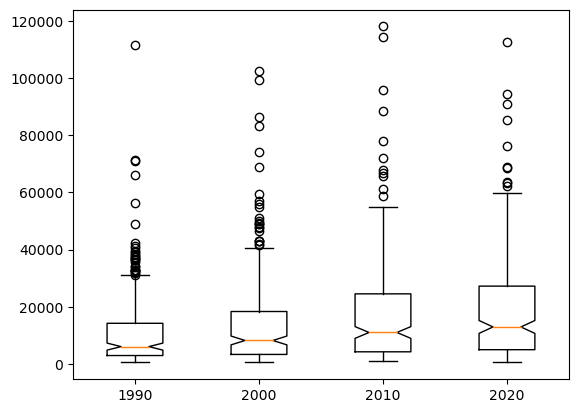

In [19]:
fig, ax = plt.subplots()

ax.boxplot(
    x = [gdp_decades['GDP_Per_Capita'].loc[gdp_decades['Year'] == 1990]
        ,gdp_decades['GDP_Per_Capita'].loc[gdp_decades['Year'] == 2000]
        ,gdp_decades['GDP_Per_Capita'].loc[gdp_decades['Year'] == 2010]
        ,gdp_decades['GDP_Per_Capita'].loc[gdp_decades['Year'] == 2020]
    ]
    ,notch = True
)
plt.xticks([1, 2, 3, 4], [1990, 2000, 2010, 2020])
;

#### Seaborn Box plot

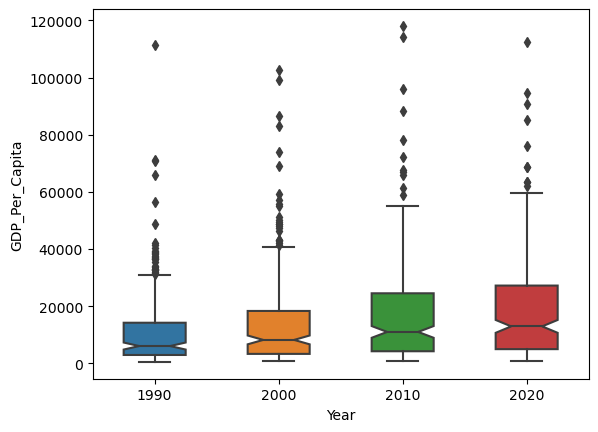

In [20]:
sns.boxplot(
    data = gdp_decades
    ,x = gdp_decades['Year']
    ,y = gdp_decades['GDP_Per_Capita']
    ,notch = True
    ,width = 0.5
);

#### Bar plot

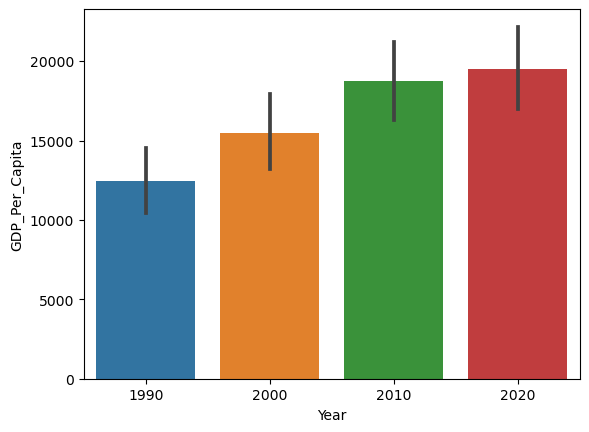

In [21]:
sns.barplot(
    data = gdp_decades
    ,x = 'Year'
    ,y = 'GDP_Per_Capita'
);

#### Scatter plot

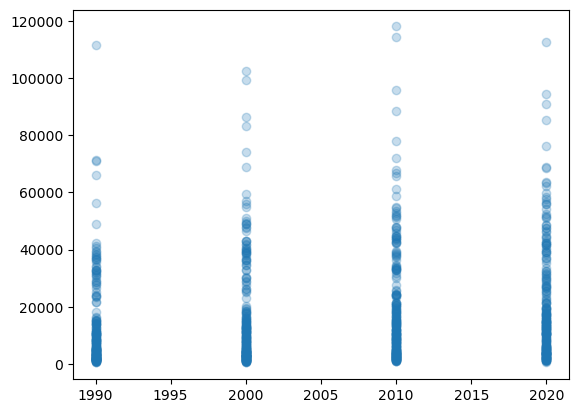

In [72]:
plt.scatter(
    x = gdp_decades['Year'], 
    y = gdp_decades['GDP_Per_Capita'],
    alpha = 0.25
);

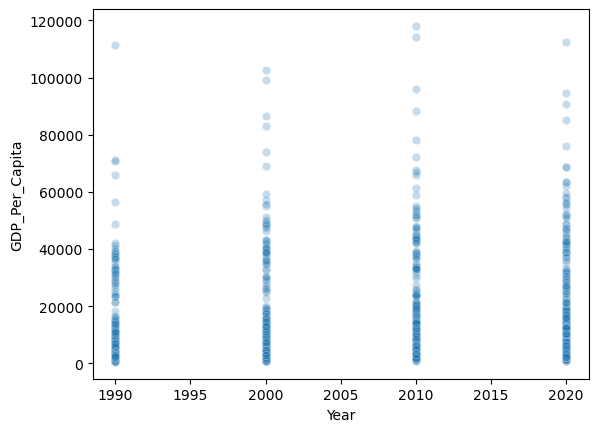

In [23]:
sns.scatterplot(
    x = gdp_decades['Year'], 
    y = gdp_decades['GDP_Per_Capita'],
    alpha = 0.25
);

### 11. Which country was the first to have a GDP per capita greater than $100,000?

In [24]:
over_100k = gdp_df.loc[gdp_df['GDP_Per_Capita'] > 100000]
over_100k.loc[over_100k['Year'] == over_100k['Year'].min()]

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


### 12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [25]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]

In [26]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


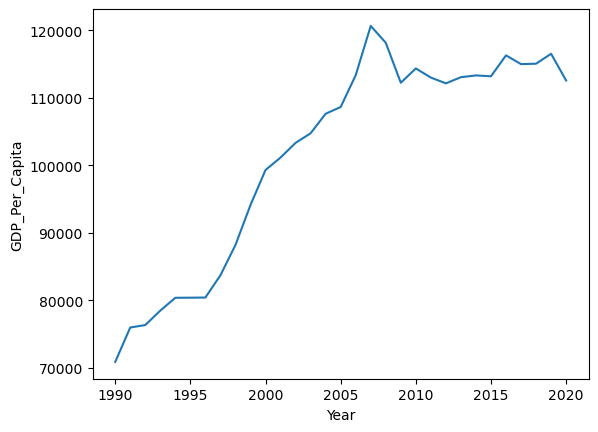

In [27]:
sns.lineplot(
    data = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
    ,x = 'Year'
    ,y = 'GDP_Per_Capita'
);

### 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [28]:
gdp_2020.loc[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


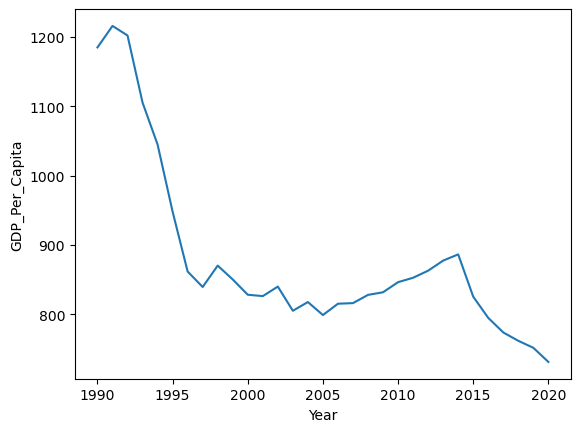

In [29]:
sns.lineplot(
    data = gdp_df.loc[gdp_df['Country'] == 'Burundi']
    ,x = 'Year'
    ,y = 'GDP_Per_Capita'
);

In [30]:
gdp_1990 = gdp_df.loc[gdp_df['Year'] == 1990] 

In [31]:
gdp_1990_2020 = pd.merge(
    gdp_1990
    ,gdp_2020
    ,on = 'Country'
    ,how = 'inner'
)

In [32]:
gdp_1990_2020.loc[gdp_1990_2020['GDP_Per_Capita_x'] > gdp_1990_2020['GDP_Per_Capita_y']]

,Country,Year_x,GDP_Per_Capita_x,Year_y,GDP_Per_Capita_y
9,Aruba,1990,32589.018572,2020,29563.756955
15,Barbados,1990,13985.829980,2020,13316.487393
25,Brunei,1990,71232.789430,2020,62200.882043
28,Burundi,1990,1184.842032,2020,731.064074
33,Central African Republic,1990,1201.674665,2020,937.856470
39,Comoros,1990,3061.328732,2020,2984.413403
40,Congo,1990,5068.286948,2020,3497.565454
44,Dem. Rep. Congo,1990,1819.723315,2020,1082.445242
65,Fragile and conflict affected situations,1990,4874.531032,2020,4450.512739
67,Gabon,1990,18179.170002,2020,14320.844646


### 14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [33]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines = 'skip')

In [34]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [35]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN
4674,180,The methodology used to estimated the figure f...,NaN,NaN


In [36]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4675 non-null   object 
 1   Year             4675 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.2+ KB


In [37]:
footnote_df = internet_df.loc[pd.isnull(internet_df['Value']) == True]

In [38]:
internet_df = internet_df.loc[pd.isnull(internet_df['Value']) == False]
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [39]:
internet_df = internet_df.astype({'Year' : 'int64'})
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


### 15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [40]:
internet_df.drop(columns='Value Footnotes', inplace = True)
internet_df

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [41]:
internet_df.rename(columns = {'Country or Area':'Country', 'Value':'Internet_Users_Pct'}, inplace = True)
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [42]:
by_year_internet = internet_df.groupby('Year').mean()
by_year_internet

,Internet_Users_Pct
Year,
1960,0.000000
1965,0.000000
1970,0.000000
1975,0.000000
1976,0.000000
1977,0.000000
1978,0.000000
1979,0.000000
1980,0.000000


### 17. What is the first year to have a non-zero internet users percentage value?

In [43]:
by_year_internet.loc[by_year_internet['Internet_Users_Pct'] > 0].reset_index()['Year'].min()

1990

### 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [44]:
internet_df.loc[internet_df['Year'] == 2000]['Internet_Users_Pct']

29       0.114097
50       0.491706
72      10.538836
92       0.105046
112      6.482226
          ...    
4403     0.254248
4423    13.815081
4445     0.082500
4465     0.191072
4487     0.401434
Name: Internet_Users_Pct, Length: 199, dtype: float64

In [45]:
pd.to_numeric(internet_df['Year'])

0       2014
1       2013
2       2012
3       2011
4       2010
        ... 
4490    1997
4491    1996
4492    1995
4493    1994
4494    1990
Name: Year, Length: 4495, dtype: int64

### 19. For how many countries was the percentage of internet users below 5% in 2014?

In [46]:
internet_df.loc[internet_df['Year'] == 2014].loc[internet_df['Internet_Users_Pct'] < 5].sort_values('Internet_Users_Pct')

,Country,Year,Internet_Users_Pct
1065,Dem. People's Rep. of Korea,2014,0.00
1256,Eritrea,2014,0.99
4019,Timor-Leste,2014,1.14
623,Burundi,2014,1.38
3648,Somalia,2014,1.63
1720,Guinea,2014,1.72
2975,Niger,2014,1.95
2814,Myanmar,2014,2.10
3533,Sierra Leone,2014,2.10
782,Chad,2014,2.50


### 20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [47]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
...,...,...,...,...
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621


In [48]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN


In [49]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
8251,Yemen,1999,NaN,0.056629
8252,Yemen,1998,NaN,0.023323
8253,Yemen,1997,NaN,0.015025
8254,Yemen,1996,NaN,0.000621
8255,Yemen,1990,NaN,0.000000


In [50]:
gdp_and_internet_use.loc[pd.notna(gdp_and_internet_use['GDP_Per_Capita']) & pd.notna(gdp_and_internet_use['Internet_Users_Pct'])]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.390000
7,Afghanistan,2013,2116.465258,5.900000
8,Afghanistan,2012,2075.491614,5.454545
9,Afghanistan,2011,1904.559926,5.000000
10,Afghanistan,2010,1957.029070,4.000000
...,...,...,...,...
7168,Zimbabwe,1997,2856.118188,0.033080
7169,Zimbabwe,1996,2808.558556,0.016790
7170,Zimbabwe,1995,2573.993785,0.007684
7171,Zimbabwe,1994,2603.927369,0.001739


### 21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

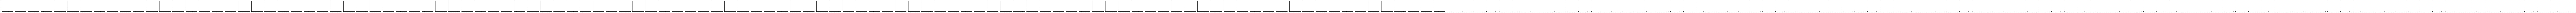

In [54]:
sns.FacetGrid(
    data = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
    ,col = 'Internet_Users_Pct'
)

### 22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [58]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use['Year'] == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6,Afghanistan,2014,2102.384604,6.39
25,Africa Eastern and Southern,2014,3677.319414,NaN
56,Africa Western and Central,2014,4215.646000,NaN
87,Albania,2014,11586.833878,60.10
118,Algeria,2014,11512.690472,18.09
...,...,...,...,...
8147,Turkey,2014,NaN,51.04
8170,Venezuela,2014,NaN,57.00
8194,Viet Nam,2014,NaN,48.31
8214,Virgin Islands (U.S.),2014,NaN,50.07


### 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

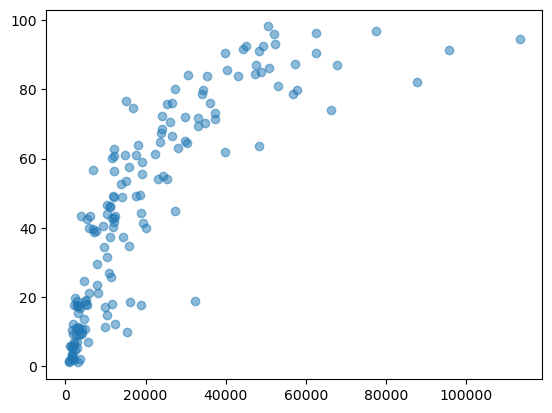

In [70]:
plt.scatter(
    data = gdp_and_internet_use_2014
    ,x = 'GDP_Per_Capita'
    ,y = 'Internet_Users_Pct'
    ,alpha = 0.5
);

### 24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [102]:
bin = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'], 3)
bin.info()

<class 'pandas.core.series.Series'>
Int64Index: 281 entries, 6 to 8236
Series name: GDP_Per_Capita
Non-Null Count  Dtype   
--------------  -----   
242 non-null    category
dtypes: category(1)
memory usage: 2.6 KB


In [97]:
bin.rename({})